In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [31]:
def z_score(sample_mean, sample_size, pop_mean, pop_std):
    nume = sample_mean- pop_mean
    deno = pop_std/np.sqrt(n)
    z = nume/ deno
    return z

$$Q-1$$

$
Step\ 1:\\
Null\ Hypothesis(Status\ Quo):H_o\ =\ 500\\
Alternate\ Hypothesis(Bold\ claim):H_1\ \neq\ 500\\
(Since\ it\ is\ a\ claim\ that\ pista\ house\ is\ not\ supplying\ 500grams\ of\ Biryani\ per\ packet)\
$

$
Step\ 2:\\
Collect\ a\ Sample\ of\ size\ n\ =\ 10\\
$
$$
Sample:\ [510,\ 390,\ 400,\ 500,\ 475,\ 525,\ 260,\ 420,\ 450,\ 440]\\
$$
$
Calculate\ the\ mean(\overline{X})\ of\ the\ sample.\
$

    



In [108]:
Sample = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
n = 10
mean = sum(Sample) / n 
print("Mean:",mean)


Mean: 465.3


$
Step\ 3:\
Compute\ Test\ Statistics.\\
Use\ "z-score"\ if\ Standard\ Deviation(\sigma)\ is\ given\\
$
$$
z-score\ =\  \frac{\overline{X}-\mu_{\overline{X}}}{\frac{\sigma}{\sqrt{n}}} \\
$$
$
Else\ use\ "t-score"\ if\ Standard\ Deviation(\sigma)\ is\ not\ given\:\
$
$$
t-score\ =\ \frac{\overline{X}-\mu_{\overline{X}}}{\frac{S}{\sqrt{n}}}\\
$$
$$
where, S\ =\ Sample\ Standard\ Deviation\\
S = \sqrt{\frac{\sum_{i=0}^{n}(Obs-\overline{X})^2}{n-1}}\\
\mu_{\overline{X}}\ =\ 500\ =\ Population\ mean\\
$$


In [109]:
SD = np.sqrt(sum((x-mean) **2 for x in Sample)/(n-1))
print("S.D:", SD)
SE = SD/ np.sqrt(n-1)
pop_mean = 500
print(SE)

S.D: 86.84859110991827
28.94953036997276


$Since\ we\ don't\ have\ \sigma\ given\ we\ will\ go\ for\ t-score\$


In [103]:
t_score = z_score(mean, n, pop_mean, SD)
print("t-score:",t_score)

t-score: -1.2634751284446715


$
Step\ 4:\\ 
Decide\ the\ value\ of\ significance\ level(\alpha)\\
If\ confidence\ level\ is\ taken\ as\ 95\%\ =\ 0.95 \\
then, \\
$
$$
1\ -\ \alpha\ =\ 0.95\\
\alpha\ =\ 0.05\\
$$

In [114]:
from scipy.stats import t
confidence_level = 0.95
alpha = 1- confidence_level
alpha = 0.05


In [115]:
t_critical = t.ppf((1.0 - (alpha/2)), df = 9)
print(t_critical)

2.2621571627409915


$
Step\ 5.1:\
    Apply\ decision\ rule\\
    For\ Bold\ Claim\ H_o\ \neq\ 500\ we\ consider\ 2\ tailed\ t-test.\\
$    

Text(465.3, 0.0007, 'x_bar')

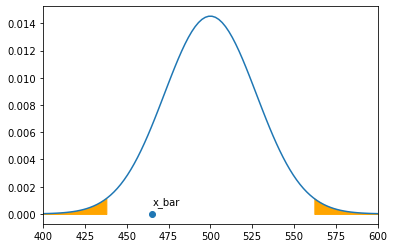

In [116]:
mx = 600
mn = 400

#
Mean = pop_mean
#sampling standard deviation
std = SD / n ** 0.5

#plotting the distribution and setting x limits
x = np.linspace(mn, mx, 100)
y = norm.pdf(x, Mean, std)
plt.xlim(mn, mx)
plt.plot(x, y)

t_critical_left = pop_mean + (-(t_critical) * std)
t_critical_right = pop_mean + (t_critical * std)


x1 = np.linspace(mn, t_critical_left, 100)
y1 = norm.pdf(x1, Mean, std)
plt.fill_between(x1, y1, color = "orange")

x2 = np.linspace(t_critical_right, mx, 100)
y2 = norm.pdf(x2, Mean, std)
plt.fill_between(x2, y2, color="orange")

plt.scatter(mean, 0)
plt.annotate("x_bar", (mean, 0.0007))

$
Step\ 5.2:\ Calculate\ p-value\ and\ get\ the\ conclusion\\ 
$

$Conclusion\ using\ t-test\$

In [117]:
if (t_score > t_critical or t_score< -(t_critical)):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Fail to Reject Null Hypothesis


$
Conclusion\ using\ p-value\
$

In [118]:
p_value = 2 * (1.0 - norm.cdf(np.abs(t_score)))
print("p-value:", p_value)
if (p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

p-value: 0.20641847943818092
Fail to Reject Null Hypothesis
